In [1]:
!pip install matplotlib opencv-python pillow



In [57]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from blackboard import Blackboard
from agents.bounding_box_agent import BoundingBoxAgent
from agents.model_specific_agent import ModelSpecificAgent
from agents.coordinator_agent import CoordinatorAgent
from agents.data_processing_agent import DataProcessingAgent
from agents.rl_bounding_box_agent import RLBoundingBoxAgent


In [59]:
def draw_bounding_boxes(image, boxes, title="Bounding Boxes", color_index=100):
    """Draw bounding boxes on an image with filled rectangle labels."""
    img = image.copy()
    color = (0, 255, 0)  # Default color: green
    colors = [(255, 0, 0), (0, 0, 255)]  # Color list: red, blue
    
    for box in boxes:
        if color_index < len(colors):
            color = colors[color_index]
        x1, y1, x2, y2 = box["box"]
        label = box.get("label", "Object")
        score = box.get("score", 0.0)
        text = f"{label} ({score:.2f})"
        
        # Calculate text size and position
        (text_width, text_height), baseline = cv2.getTextSize(
            text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2
        )
        label_x1, label_y1 = int(x1), int(y1) - text_height - 5
        label_x2, label_y2 = int(x1) + text_width, int(y1)
        
        # Adjust if the label rectangle is out of image bounds
        label_y1 = max(label_y1, 0)

        # Draw bounding box
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
        
        # Draw filled rectangle for the label background
        cv2.rectangle(img, (label_x1, label_y1), (label_x2, label_y2), color, cv2.FILLED)
        
        # Draw the label text in white
        cv2.putText(
            img, text, (int(x1), int(y1) - 5), cv2.FONT_HERSHEY_SIMPLEX, 
            0.5, (255, 255, 255), 2
        )
        
        color_index += 1

    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

print("✅ Utility functions loaded!")


✅ Utility functions loaded!


In [207]:
def load_image(path):
    """Load an image from file."""
    image = cv2.imread(path)
    if image is None:
        raise FileNotFoundError(f"Image at path '{path}' not found.")
    return image

image_path = "141648.jpg"  # Change this to your image path
image = load_image(image_path)
print("✅ Image loaded successfully!")


✅ Image loaded successfully!


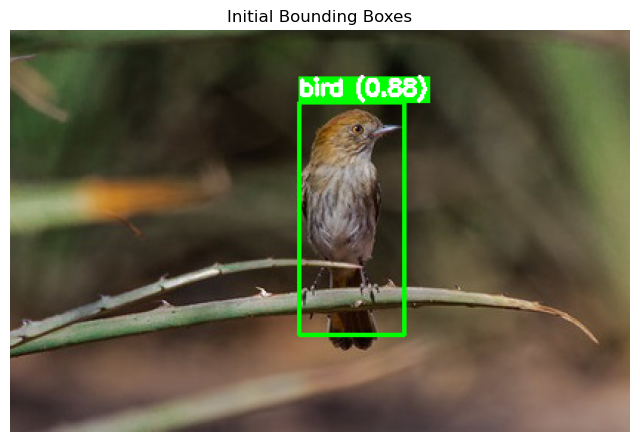

In [221]:
initial_boxes = [
	#{"box": [195, 52, 270, 220], "score": 0.95, "label": "bird"},
	{"box": [195.0, 49.55, 266.5, 206.35], "score": 0.875, "label": "bird"}, 
	#{"box": [180.05, 204.15, 468.8, 390.25], "score": 0.8, "label": "bus"}
    
]

draw_bounding_boxes(image, initial_boxes, title="Initial Bounding Boxes", color_index=10)


📡 Agent box0 posting box {'box': [195, 52, 270, 220], 'score': 0.95, 'label': 'bird'}
🔍 Debug: data = {'box': [195, 52, 270, 220], 'score': 0.95, 'label': 'bird'}
🔍 Debug: bbox_data = {'box': [195, 45, 260, 181], 'score': 0.8, 'label': 'bird'}

🔄 Round 1 Start
  ✅ Best Proposal (Round 1): Utility=0.793, IoU=0.642

🔄 Round 2 Start
  ✅ Best Proposal (Round 2): Utility=0.793, IoU=0.642
⚠️ Utility did not improve. Adjusting my own box.
📡 Agent box1 posting box {'box': [195.0, 47.099999999999994, 263.0, 192.7], 'score': 0.8, 'label': 'bird'}

🔄 Round 3 Start
  ✅ Best Proposal (Round 3): Utility=0.822, IoU=0.740
  ✅ Merging boxes in Round 3 (IoU reached threshold)
📡 Fused box fused_box1 with ancestry ['box0', 'box1']
🗑️ Moved ancestor box box0 to removed registry.
🗑️ Moved ancestor box box1 to removed registry.
🗑️ Removed fused_box1 from blackboard after final fusion.
🗂️ Removed Bounding Boxes History: {'box0': {'box': [195, 52, 270, 220], 'score': 0.95, 'label': 'bird'}, 'box1': {'box': [19

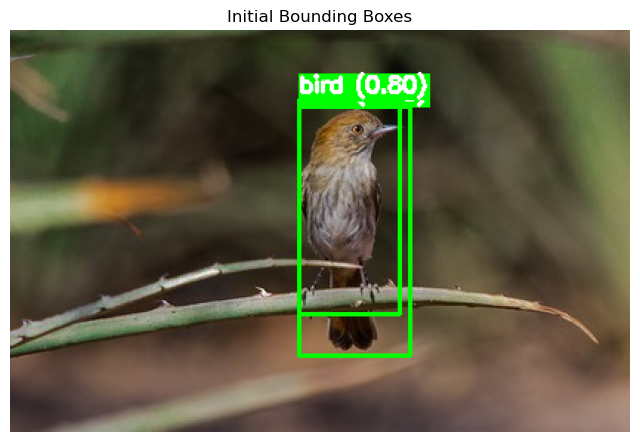

KeyError: 'box'

In [211]:
def visualize_evolution(image, boxes, title):
    """Visualize bounding box fusion evolution."""
    blackboard = Blackboard()

    # Create agents for each bounding box
    agents = [BoundingBoxAgent(f"box{i}", box, blackboard, model_reliability=1.0, use_multi_round=True) for i, box in enumerate(boxes)]

    # Agents analyze and propose
    for agent in agents:
        agent.analyze_and_propose()

    # Coordinator decides
    coordinator = CoordinatorAgent(blackboard)
    coordinator.review_and_decide()

    # Get fused boxes from blackboard
    fused_boxes = blackboard.read("final_fused_boxes")
    print(fused_boxes)
    # Ensure fused_boxes is a list
    if isinstance(fused_boxes, dict):
        fused_boxes = [fused_boxes]

    # Draw initial and fused bounding boxes
    draw_bounding_boxes(image, boxes, title="Initial Bounding Boxes")
    draw_bounding_boxes(image, fused_boxes, title="Fused Bounding Boxes")
    print("✅ Bounding box fusion and visualization complete!")

visualize_evolution(image, initial_boxes, title="Bounding Box Evolution")
